In [1]:
import numpy as np
import scipy
import random
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

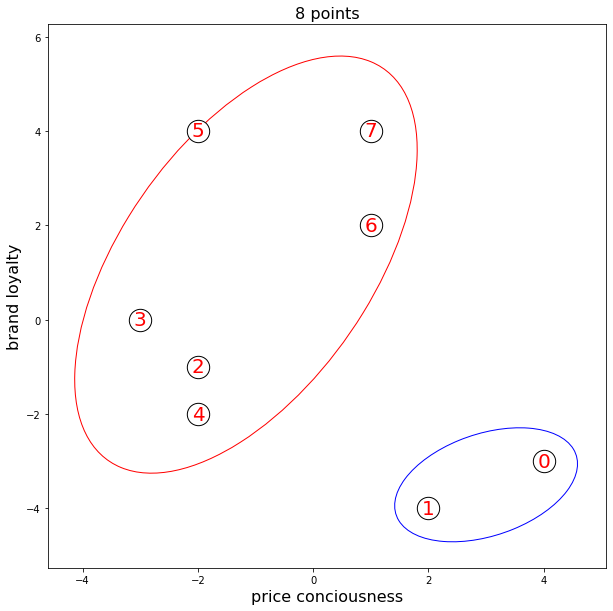

In [2]:
eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7,6,2,0,3,1,5,4], :]

random.seed(11)

sc = SpectralClustering(n_clusters=2, eigen_solver="arpack", affinity = "rbf", random_state = 11).fit(eight)

scipy.linalg.eigh(sc.affinity_matrix_)

covm = np.cov(eight[np.where(sc.labels_ == 0)][:, 0], eight[np.where(sc.labels_ == 0)][:, 1])
eigva = np.sqrt(np.linalg.eig(covm)[0])
eigve = np.linalg.eig(covm)[1]

covm1 = np.cov(eight[np.where(sc.labels_ == 1)][:, 0], eight[np.where(sc.labels_ == 1)][:, 1])
eigva1 = np.sqrt(np.linalg.eig(covm1)[0])
eigve1 = np.linalg.eig(covm1)[1]

fig, ax = plt.subplots(figsize = (10, 10))
plt.scatter(eight[:, 0], eight[:, 1], c = "w", edgecolors = "black", s = 500)
for i in range(0, 8):
    plt.text(eight[i, 0], eight[i, 1], str(i), fontsize = 20, color = "r", 
             verticalalignment = "center", horizontalalignment = 'center')
    
ax.add_patch(Ellipse(xy = (np.mean(eight[np.where(sc.labels_ == 0)][:, 0]), 
                           np.mean(eight[np.where(sc.labels_ == 0)][:, 1])),
                     width = scipy.linalg.eigh(sc.affinity_matrix_)[0][0]*3*1.15, 
                     height = scipy.linalg.eigh(sc.affinity_matrix_)[0][1]*3*1.15,
                     angle = np.rad2deg(np.arccos(eigve[0, 1])), 
                     facecolor = "w", edgecolor = "b", zorder = 0))

ax.add_patch(Ellipse(xy = (np.mean(eight[np.where(sc.labels_ == 1)][:, 0]), 
                           np.mean(eight[np.where(sc.labels_ == 1)][:, 1])),
                     width = eigva1[0]*3*1.15, 
                     height = eigva1[1]*3*1.15,
                     angle = np.rad2deg(np.arccos(eigve1[0, 0])), 
                     facecolor = "w", edgecolor = "r", zorder = 0))
ax.set_xlabel("price conciousness", fontsize = 16)
ax.set_ylabel("brand loyalty", fontsize = 16)
plt.title("8 points", fontsize = 16)
plt.show()